[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Fuenfgeld/DMA2022DataProjectA/blob/main/Code/analyse.ipynb)

In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging
import datetime

In [ ]:
# Load GitHub repo
%cd /content/
%rm -r ./DMA2022DataProjectA
!git clone https://github.com/Fuenfgeld/DMA2022DataProjectA.git
%cd ./DMA2022DataProjectA/Code/

Logging konfigurieren

In [3]:
logging.basicConfig(filename="../Logs/log.txt", level=logging.DEBUG)
logging.getLogger('matplotlib').setLevel(logging.WARNING)

In [4]:
#connect to DB
conn = sqlite3.connect('../datawarehouse.db')
cursor = conn.cursor()
logging.debug(" "+str(datetime.datetime.now()) + " analyse.ipynb opened a connection to the database")
print("Opened database successfully");

Opened database successfully


# Analyse


Um unsere Forschungsfrage durchzuführen wird in diesem Notebook die Analyse durchgeführt. Weitere Informationen über die Forschungsfrage und unsere Dokumentation ist in unserem [Wiki](https://github.com/Fuenfgeld/DMA2022DataProjectA/wiki) zu finden.

#### Zusätzliche Leiden der an Corona erkranten Patienten 


In [5]:
df_infizierte_patienten_infos = pd.read_sql_query("SELECT patient_ID, facts_table.VALUE, conditions.DESCRIPTION AS Condition_Description, immunizations.CODE, observations.DESCRIPTION AS Observation_Description FROM facts_table LEFT JOIN conditions ON facts_table.patient_ID = conditions.PATIENT LEFT JOIN immunizations ON facts_table.patient_ID = immunizations.PATIENT LEFT JOIN observations ON facts_table.patient_ID = observations.PATIENT WHERE facts_table.condition_Id is NOT NULL AND (facts_table.VALUE==840539006 OR facts_table.VALUE==840544004)", conn)
df_infizierte_patienten_infos

,patient_ID,VALUE,Condition_Description,CODE,Observation_Description
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,840544004,COVID-19,83.0,Adenovirus A+B+C+D+E DNA [Presence] in Respira...
1,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,840544004,COVID-19,83.0,Body Height
2,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,840544004,COVID-19,83.0,Body Height
3,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,840544004,COVID-19,83.0,Body Mass Index
4,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,840544004,COVID-19,83.0,Body Weight
...,...,...,...,...,...
11736905,2712205f-755e-4897-acb3-926895b7d635,840539006,Joint pain (finding),140.0,None
11736906,2712205f-755e-4897-acb3-926895b7d635,840539006,Metabolic syndrome X (disorder),140.0,None
11736907,2712205f-755e-4897-acb3-926895b7d635,840539006,Muscle pain (finding),140.0,None
11736908,2712205f-755e-4897-acb3-926895b7d635,840539006,Sputum finding (finding),140.0,None


In [6]:
df_weitere_corona_beschwerden = df_infizierte_patienten_infos.groupby(by="Condition_Description", dropna=True)["Condition_Description"].count().to_frame()
df_weitere_corona_beschwerden.insert(loc=0, column='Description', value=df_weitere_corona_beschwerden.index)
df_weitere_corona_beschwerden = df_weitere_corona_beschwerden.rename(columns={"Condition_Description":"Count"})
df_weitere_corona_beschwerden = df_weitere_corona_beschwerden.sort_values(by=['Count'], ascending=False).reset_index(drop= True)
df_weitere_corona_beschwerden[2:12]

,Description,Count
2,Fever (finding),753414
3,Respiratory distress (finding),608742
4,Hypoxemia (disorder),608742
5,Pneumonia (disorder),608742
6,Cough (finding),568108
7,Loss of taste (finding),431277
8,Body mass index 30+ - obesity (finding),324275
9,Fatigue (finding),305015
10,Prediabetes,281945
11,Anemia (disorder),268734


[]

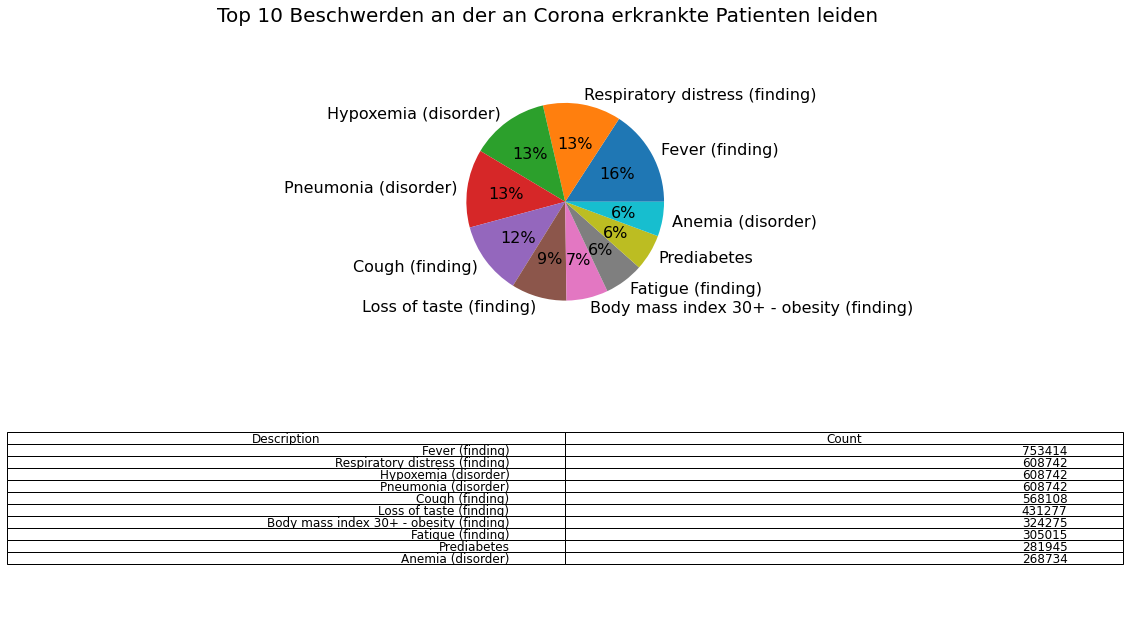

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=1)
plt.gcf().set_size_inches(20, 10)

#Plot für Kuchendiagramm

pie = ax[0].pie(df_weitere_corona_beschwerden[2:12].Count,labels=df_weitere_corona_beschwerden.Description[2:12], autopct = '%0.0f%%', textprops={'fontsize': 16})


#Plot für Tabelle
table = ax[1].table(cellText=df_weitere_corona_beschwerden[2:12].values, colLabels=df_weitere_corona_beschwerden[2:12].columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
# ax[1].axis('tight')
ax[1].axis('off')


fig.suptitle("Top 10 Beschwerden an der an Corona erkrankte Patienten leiden",fontsize=20)
plt.plot()

Die folgende Query liefert und alle Patienten, die gegen Influenza geimpft wurden. Die Impfung mit dem Code 140 ist die Influenzaimpfung in unserem Datensatz

In [8]:
print(pd.read_sql_query("SELECT DISTINCT patient_ID, VALUE FROM facts_table WHERE immunization_code is NOT NULL AND VALUE==140", conn))

                                 patient_ID  VALUE
0      f0f3bc8d-ef38-49ce-a2bd-dfdda982b271    140
1      067318a4-db8f-447f-8b6e-f2f61e9baaa5    140
2      ae9efba3-ddc4-43f9-a781-f72019388548    140
3      199c586f-af16-4091-9998-ee4cfc02ee7a    140
4      f58bf921-cba1-475a-b4f8-dc6fa3b8f89c    140
...                                     ...    ...
10252  eec72396-d10e-4b8e-8fb6-25fc1e396031    140
10253  3daf2b90-c439-469f-bb44-fb6109c6a8a7    140
10254  cb03d88e-7f08-46a1-be78-70d9fe8262a7    140
10255  435be43f-cb57-442f-aeb2-51018b030ed0    140
10256  2712205f-755e-4897-acb3-926895b7d635    140

[10257 rows x 2 columns]


Die folgende Query liefert und alle Patienten, die gegen Influenza geimpft wurden. Jeder Patient der als VALUE "COVID-19" hat, ist an Covid-19 gestorben. Nach unserer Definition gilt ein Verlauf als schwer, wenn der Patient stirbt.

In [9]:
print(pd.read_sql_query("SELECT DISTINCT patient_ID, VALUE FROM facts_table WHERE observation_code is NOT NULL AND VALUE=='COVID-19'", conn))

                              patient_ID     VALUE
0   c70992c9-ff13-467b-9032-1901506edeef  COVID-19
1   a5c39700-6bf3-4984-af46-31344695e21b  COVID-19
2   edad31f3-5a08-4678-8d31-271a41a2aad5  COVID-19
3   000e7adf-cbaa-4fad-ab2f-658c32f7d4d3  COVID-19
4   ce718268-3e91-4d5d-98d0-508286f0eeb2  COVID-19
5   34916863-676d-4224-9356-c28e78526641  COVID-19
6   c16e1174-233b-4efd-8f47-aa12b35aef8a  COVID-19
7   dd5a1f10-b8e6-4141-8e0a-26f34f4ce412  COVID-19
8   6ef1728a-28e0-4dbd-989f-d91ebeffbac4  COVID-19
9   1505bc4d-8843-425b-aaa3-0e431d9402fd  COVID-19
10  0100f99a-1b5d-4a5b-a73f-559a920412e5  COVID-19
11  d4b977ce-8d36-4651-a593-4e403b78947f  COVID-19
12  7a51f54b-bf90-4319-a53f-76646e791e55  COVID-19
13  78d06517-d48c-49ef-ada2-8b5290b113dc  COVID-19
14  0008a63c-c95c-46c2-9ef3-831d68892019  COVID-19
15  991959ab-0188-4916-aa95-664845579bb0  COVID-19
16  51d02f7d-6a65-4d6c-aa5f-ef43f1e372cb  COVID-19
17  05fdcc72-b031-4947-a364-b29027807d53  COVID-19
18  9cd159bb-f711-45b3-a353-1e3

### Wie viele Patienten sind insgesamt gegen Influenza geimpft?

Mit der folgenden Query werden alle Patienten die in der Impftabelle vorhanden sind ausgegeben

In [10]:
df_alle_impfungen = pd.read_sql_query("SELECT DISTINCT patient_ID, VALUE FROM facts_table WHERE immunization_code is NOT NULL", conn)

Hier werden die Patienten kategorisiert. Die Kategorien sind "Hat eine Influenza Impfung erhalten" und "Hat keine Influenza Impfung erhalten"

In [11]:
geimpfte = []
geimpfte_patienten_all_df = pd.DataFrame(columns=['Patienten', 'Grippe Impfung'])
geimpfte_patienten_all_df.Patienten = df_alle_impfungen.patient_ID.unique()

#Prüfung ob der Code 140 in den Daten enthalten ist, dieser gibt Aufschluss darauf ob die Patienten eine Grippeimpfung erhalten haben. 
for id in df_alle_impfungen.patient_ID.unique():
    patient = df_alle_impfungen.loc[df_alle_impfungen.patient_ID == id]
    exist = 140 in patient['VALUE'].unique()
    geimpfte .append(exist)
geimpfte_patienten_all_df['Grippe Impfung']= geimpfte 
geimpfte_patienten_all_df

,Patienten,Grippe Impfung
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,True
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,True
2,ae9efba3-ddc4-43f9-a781-f72019388548,True
3,199c586f-af16-4091-9998-ee4cfc02ee7a,True
4,f58bf921-cba1-475a-b4f8-dc6fa3b8f89c,True
...,...,...
10371,eec72396-d10e-4b8e-8fb6-25fc1e396031,True
10372,3daf2b90-c439-469f-bb44-fb6109c6a8a7,True
10373,cb03d88e-7f08-46a1-be78-70d9fe8262a7,True
10374,435be43f-cb57-442f-aeb2-51018b030ed0,True


In [12]:
print("Es wurden", geimpfte_patienten_all_df['Grippe Impfung'].value_counts()[True], "Patienten gegen Influenza geimpft")
print(geimpfte_patienten_all_df['Grippe Impfung'].value_counts()[False], "Patienten wurden nicht gegen Influenza geimpft")


Es wurden 10257 Patienten gegen Influenza geimpft
119 Patienten wurden nicht gegen Influenza geimpft


In [13]:
verhaeltnis_geimpft_insgesamt = geimpfte_patienten_all_df['Grippe Impfung'].value_counts()[True] / len(geimpfte_patienten_all_df.index)
verhaeltnis_geimpft_insgesamt

0.9885312259059368

In [14]:
verhaeltnis_ungeimpft_insgesamt = geimpfte_patienten_all_df['Grippe Impfung'].value_counts()[False] / len(geimpfte_patienten_all_df.index)
verhaeltnis_ungeimpft_insgesamt

0.011468774094063224

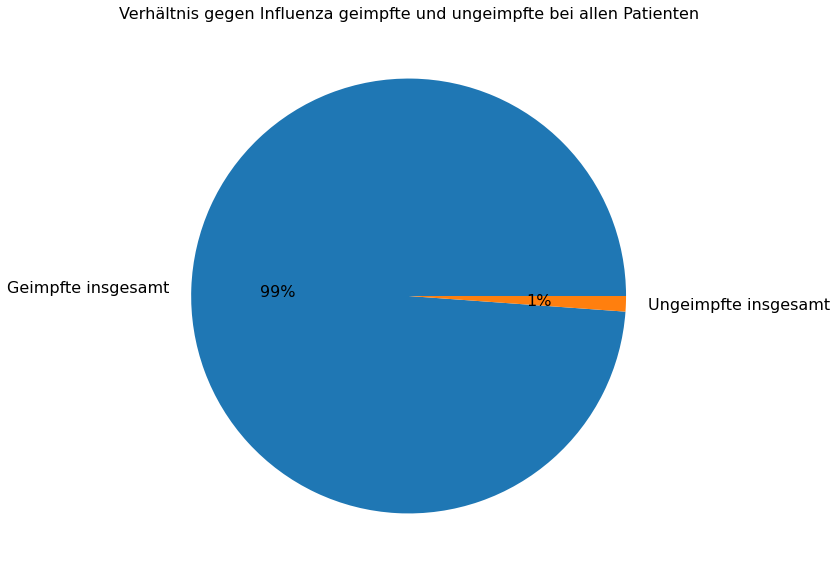

In [60]:
plt.gcf().set_size_inches(20, 10)
data = [verhaeltnis_geimpft_insgesamt, verhaeltnis_ungeimpft_insgesamt]
labels = ['Geimpfte insgesamt', 'Ungeimpfte insgesamt']
plt.title("Verhältnis gegen Influenza geimpfte und ungeimpfte bei allen Patienten", fontsize=16)
plt.pie(data, labels=labels, autopct = '%0.0f%%', textprops={'fontsize': 16})
plt.show()

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

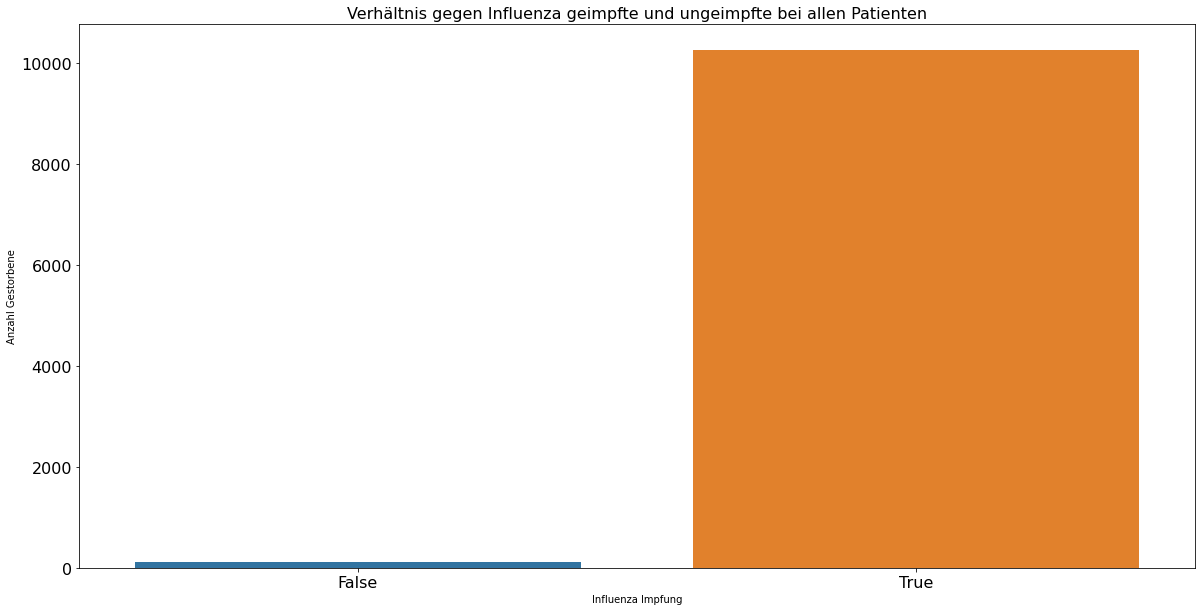

In [65]:
plt.gcf().set_size_inches(20, 10)
countplot_gestorbene = sns.countplot(x="Grippe Impfung", data=geimpfte_patienten_all_df)
plt.title("Verhältnis gegen Influenza geimpfte und ungeimpfte bei allen Patienten", fontsize=16)
countplot_gestorbene.set_ylabel("Anzahl Gestorbene")
countplot_gestorbene.set_xlabel("Influenza Impfung")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Es wird deutlich, dass es mehr Patienten gibt, die eine Influenza Impfung erhalten haben, als Patienten die keine Influenza Impfung erhalten haben. 

### Wie viele gestorbene waren gegen Influenza geimpft?

VALUE=840539006 und VALUE=840544004 bedeuten Suspected COVID-19 und COVID-19

In [17]:
df_gestorbene_patienten_infos = pd.read_sql_query("SELECT patient_ID, facts_table.VALUE, conditions.DESCRIPTION AS Condition_Description, immunizations.CODE, observations.DESCRIPTION AS Observation_Description FROM facts_table LEFT JOIN conditions ON facts_table.patient_ID = conditions.PATIENT LEFT JOIN immunizations ON facts_table.patient_ID = immunizations.PATIENT LEFT JOIN observations ON facts_table.patient_ID = observations.PATIENT WHERE facts_table.condition_Id is NOT NULL AND (facts_table.VALUE==840539006 OR facts_table.VALUE==840544004) AND observations.VALUE=='COVID-19'", conn)

Aufbau des Dataframes

In [18]:
df_gestorbene_patienten_infos.tail()

,patient_ID,VALUE,Condition_Description,CODE,Observation_Description
2257,26151e55-00b0-412b-8969-ed919ccce8cf,840539006,Pneumonia (disorder),140.0,Cause of Death [US Standard Certificate of Death]
2258,26151e55-00b0-412b-8969-ed919ccce8cf,840539006,Respiratory distress (finding),140.0,Cause of Death [US Standard Certificate of Death]
2259,26151e55-00b0-412b-8969-ed919ccce8cf,840539006,Sepsis caused by virus (disorder),140.0,Cause of Death [US Standard Certificate of Death]
2260,26151e55-00b0-412b-8969-ed919ccce8cf,840539006,Suspected COVID-19,140.0,Cause of Death [US Standard Certificate of Death]
2261,26151e55-00b0-412b-8969-ed919ccce8cf,840539006,Wheezing (finding),140.0,Cause of Death [US Standard Certificate of Death]


Hier werden alle gestorbenen Patienten durchsucht, haben sie eine Influenzaimpfung erhalten, werden sie mit TRUE markiert.

In [19]:
impfkandidat = []
geimpfte_patienten_df = pd.DataFrame(columns=['Patienten', 'Grippe Impfung'])
geimpfte_patienten_df.Patienten = df_gestorbene_patienten_infos.patient_ID.unique()

#Prüfung ob der Code 140 in den Daten enthalten ist, dieser gibt Aufschluss darauf ob die Patienten eine Grippeimpfung erhalten haben. 
for id in df_gestorbene_patienten_infos.patient_ID.unique():
    patient = df_gestorbene_patienten_infos.loc[df_gestorbene_patienten_infos.patient_ID == id]
    exist = 140 in patient['CODE'].unique()
    impfkandidat.append(exist)
geimpfte_patienten_df['Grippe Impfung']= impfkandidat


In [20]:
verhaeltnis_geimpft_tote = geimpfte_patienten_df['Grippe Impfung'].value_counts()[True] / len(geimpfte_patienten_df.index)
verhaeltnis_geimpft_tote

0.8125

81,25% aller gestorbenen waren gegen Influenza geimpft

In [21]:
verhaeltnis_ungeimpft_tote = geimpfte_patienten_df['Grippe Impfung'].value_counts()[False] / len(geimpfte_patienten_df.index)
verhaeltnis_ungeimpft_tote

0.1875

18,75% aller gestorbenen waren nicht gegen Influenza geimpft

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

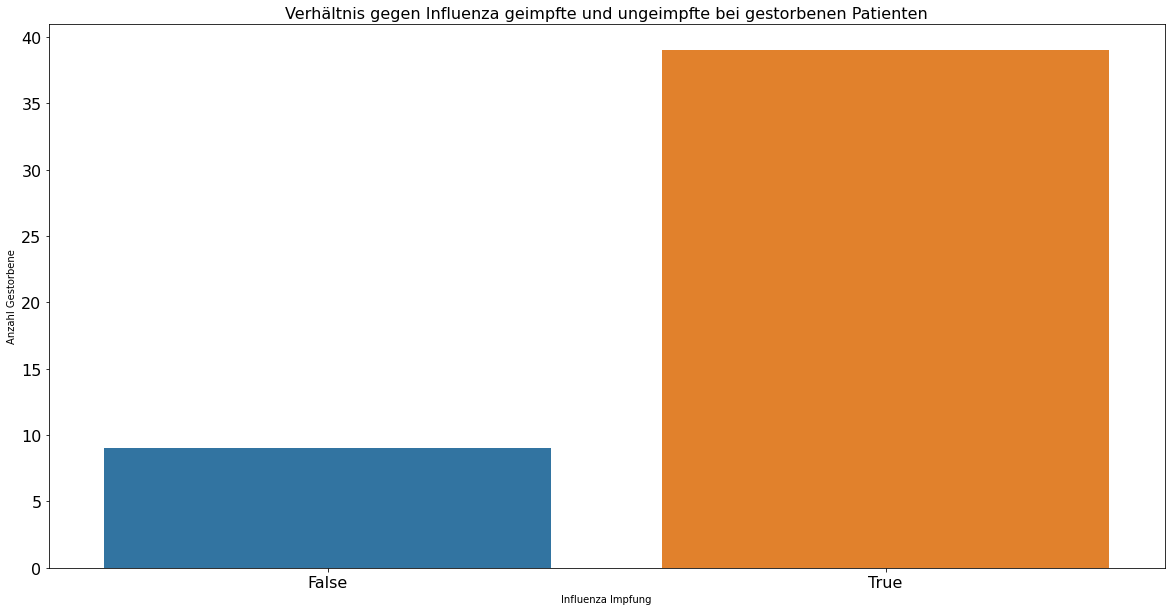

In [68]:
plt.gcf().set_size_inches(20, 10)
countplot_gestorbene = sns.countplot(x="Grippe Impfung", data=geimpfte_patienten_df)
plt.title("Verhältnis gegen Influenza geimpfte und ungeimpfte bei gestorbenen Patienten", fontsize=16)
countplot_gestorbene.set_ylabel("Anzahl Gestorbene")
countplot_gestorbene.set_xlabel("Influenza Impfung")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

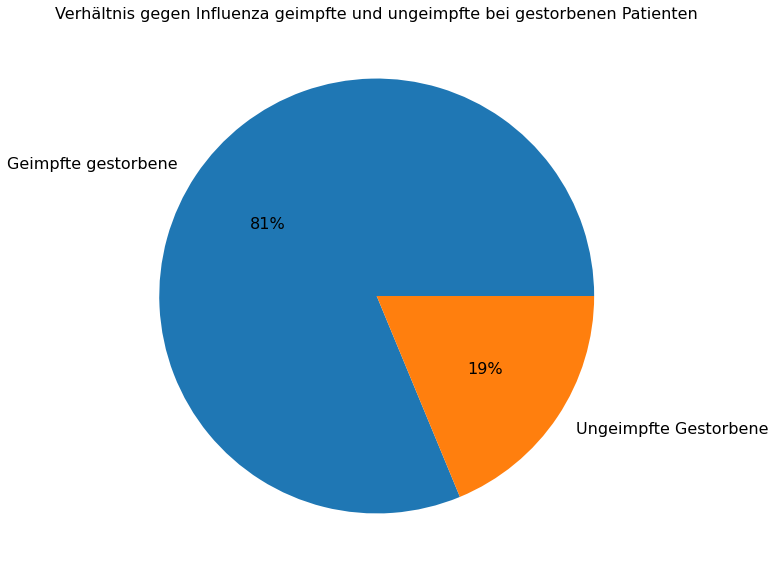

In [57]:
plt.gcf().set_size_inches(20, 10)
plt.title("Verhältnis gegen Influenza geimpfte und ungeimpfte bei gestorbenen Patienten", fontsize=16)
data = [verhaeltnis_geimpft_tote, verhaeltnis_ungeimpft_tote]
labels = ['Geimpfte gestorbene', 'Ungeimpfte Gestorbene']
plt.pie(data, labels=labels, autopct = '%0.0f%%', textprops={'fontsize': 16})

plt.show()

Generell sind im Datensatz deutlich mehr Influenzageimpfte Patienten (99%) als nicht gegen Influenza geimpfte Patienten (1%) vorhanden. Dieses Verhältnis hat sich bei den gestorbenen Patienten verändert, hier sind 19% der gestorbenen nicht gegen Influenza geimpft. Daraus könnte man schließen, dass die Sterbewahrscheinlichkeit für Covid-19 ohne Influenzaimpfung höher ist.
Nahliegender ist allerdings, dass Patienten, die sich gegen Influenza impfen lassen, auch offener gegenüber einer COVID-19 Impfung sind. Dies können wir aufgrund fehlender Daten leider nicht überprüfen.

## Hat die Ethnie einfluss auf die Sterbewahrscheinlichkeit bei Covid-19?

Betrachtung für alle Patienten:

In [24]:
df_ethnien_alle =  pd.read_sql_query("SELECT patient_ID, patients.ETHNICITY, patients.RACE, facts_table.VALUE, conditions.DESCRIPTION AS Condition_Description, immunizations.CODE, observations.DESCRIPTION AS Observation_Description FROM facts_table LEFT JOIN conditions ON facts_table.patient_ID = conditions.PATIENT LEFT JOIN immunizations ON facts_table.patient_ID = immunizations.PATIENT LEFT JOIN observations ON facts_table.patient_ID = observations.PATIENT LEFT JOIN patients ON facts_table.patient_ID = patients.Id WHERE facts_table.condition_Id is NOT NULL AND (facts_table.VALUE==840539006 OR facts_table.VALUE==840544004)", conn)

In [25]:
df_ethnien_alle_counted = df_ethnien_alle.groupby(by=["RACE", "ETHNICITY"], dropna=True)["RACE"].count().to_frame()
df_ethnien_alle_counted.insert(loc=0, column="Ethnie", value=df_ethnien_alle_counted.index)
df_ethnien_alle_counted.rename(columns = {'RACE':'Count'}, inplace = True)
df_ethnien_alle_counted = df_ethnien_alle_counted.reset_index(drop=True)

In [26]:
df_ethnien_alle_counted.drop(index=[4,5,6,7], inplace=True)
df_ethnien_alle_counted = df_ethnien_alle_counted.reset_index(drop=True)

In [27]:
df_ethnien_alle_counted["percentage"] = (df_ethnien_alle_counted.Count / df_ethnien_alle_counted.Count.sum()) * 100
df_ethnien_alle_counted

,Ethnie,Count,percentage
0,"(asian, hispanic)",76974,0.657233
1,"(asian, nonhispanic)",695198,5.935860
2,"(black, hispanic)",153228,1.308318
3,"(black, nonhispanic)",700632,5.982257
4,"(white, hispanic)",824122,7.036661
5,"(white, nonhispanic)",9261679,79.079671


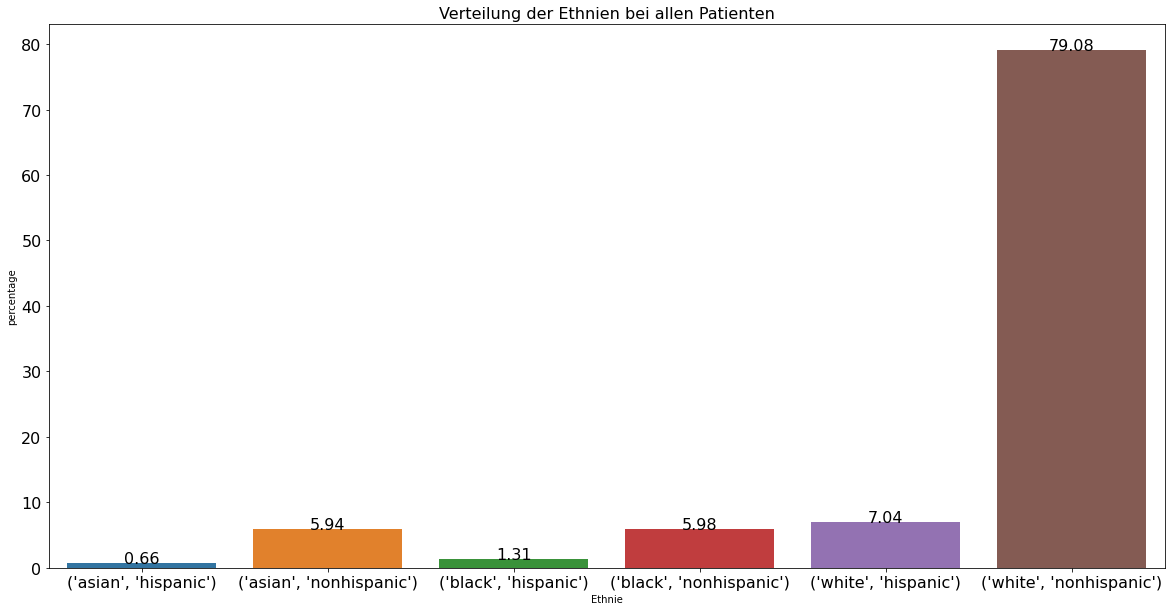

In [44]:
ax = sns.barplot(x="Ethnie", y="percentage", data=df_ethnien_alle_counted)

x = ["(asian, hispanic)", "(asian, nonhispanic)", "(black, hispanic)",
        "(black, nonhispanic)", "(white, hispanic)", "(white, nonhispanic)"]
    
y = [0.66, 5.94, 1.31, 5.98,
        7.04, 79.08]

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center', fontsize=16)

plt.title("Verteilung der Ethnien bei allen Patienten", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gcf().set_size_inches(20, 10)

Betrachtung für gestorbene Patienten:

In [29]:
df_ethnien_gestorbene =  pd.read_sql_query("SELECT patient_ID, patients.ETHNICITY, patients.RACE, facts_table.VALUE, conditions.DESCRIPTION AS Condition_Description, immunizations.CODE, observations.DESCRIPTION AS Observation_Description FROM facts_table LEFT JOIN conditions ON facts_table.patient_ID = conditions.PATIENT LEFT JOIN immunizations ON facts_table.patient_ID = immunizations.PATIENT LEFT JOIN observations ON facts_table.patient_ID = observations.PATIENT LEFT JOIN patients ON facts_table.patient_ID = patients.Id WHERE facts_table.condition_Id is NOT NULL AND (facts_table.VALUE==840539006 OR facts_table.VALUE==840544004) AND observations.VALUE=='COVID-19'", conn)

In [30]:
df_ethnien_gestorbene_counted = df_ethnien_gestorbene.groupby(by=["RACE", "ETHNICITY"], dropna=True)["RACE"].count().to_frame()
df_ethnien_gestorbene_counted.insert(loc=0, column="Ethnie", value=df_ethnien_gestorbene_counted.index)
df_ethnien_gestorbene_counted["percentage"] = (df_ethnien_gestorbene_counted.RACE / df_ethnien_gestorbene_counted.RACE.sum()) * 100
df_ethnien_gestorbene_counted.rename(columns = {'RACE':'Count'}, inplace = True)
df_ethnien_gestorbene_counted =  df_ethnien_gestorbene_counted.reset_index(drop=True)
df_ethnien_gestorbene_counted["percentage"] = (df_ethnien_gestorbene_counted.Count / df_ethnien_gestorbene_counted.Count.sum()) * 100
df_ethnien_gestorbene_counted

,Ethnie,Count,percentage
0,"(asian, hispanic)",36,1.591512
1,"(black, hispanic)",46,2.033599
2,"(black, nonhispanic)",194,8.576481
3,"(white, hispanic)",46,2.033599
4,"(white, nonhispanic)",1940,85.764810


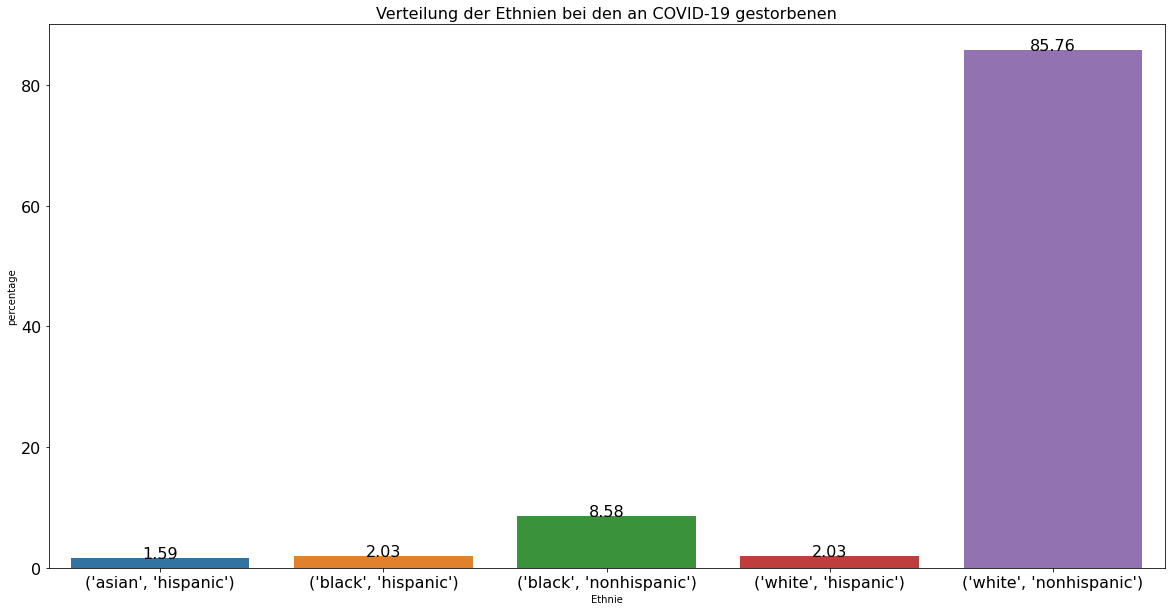

In [74]:
ax = sns.barplot(x="Ethnie", y="percentage", data=df_ethnien_gestorbene_counted)
plt.title("Verteilung der Ethnien bei den an COVID-19 gestorbenen", fontsize=16)


x = ["(asian, hispanic)", "(black, hispanic)",
        "(black, nonhispanic)", "(white, hispanic)", "(white, nonhispanic)"]
    
y = [1.59, 2.03, 8.58, 2.03, 85.76]

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center', fontsize=16)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.gcf().set_size_inches(20, 10)

Es lässt sich ablesen, die meisten gestorbenen Patienten aus der Gruppe ("white, nonhispanic") kommen. Dies ist nicht verwunderlich, da sie die größte Gruppe in unserem Datensatz sind. Auffällig ist, dass die Gruppe ("black, nonhispanic") bei den gestorbenen Patienten einen größeren Teil einnimmt (8,5%) als im Datensatz aller Patienten (5,9%). Die Bevölkerungsgruppe ("asian, nonhispanic") ist bei den gestorbenen Patienten garnicht vertreten.

In [32]:
# conn.close()
# logging.debug(" "+str(datetime.datetime.now()) + " analyse.ipynb closed the connection to the database")